In [38]:
#I put lots of comments in here, so I am barely sure you could understand easily,
#what I am trying to say :)

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection

import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [39]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [40]:
#this is the dataset from kaggle
df = pd.read_csv('nba.games.stats_raw.csv') #you could change the name of dataset
df.head() # want to check the summary of the dataset

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,29/10/2014,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,01/11/2014,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,05/11/2014,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,07/11/2014,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,08/11/2014,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [41]:
df.info() # Let's look around is there any null or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
Unnamed: 0                  9840 non-null int64
Team                        9840 non-null object
Game                        9840 non-null int64
Date                        9840 non-null object
Home                        9840 non-null object
Opponent                    9840 non-null object
WINorLOSS                   9840 non-null object
TeamPoints                  9840 non-null int64
OpponentPoints              9840 non-null int64
FieldGoals                  9840 non-null int64
FieldGoalsAttempted         9840 non-null int64
FieldGoals.                 9840 non-null float64
X3PointShots                9840 non-null int64
X3PointShotsAttempted       9840 non-null int64
X3PointShots.               9840 non-null float64
FreeThrows                  9840 non-null int64
FreeThrowsAttempted         9840 non-null int64
FreeThrows.                 9840 non-null float64
OffRebounds       

In [42]:
data = pd.DataFrame(df) # make the dataset to dataframe ( to pandas data )

In [43]:
# we decided to use only season 17 -18, so needed to divide the dataset. 

data['new_dates'] = pd.to_datetime(data['Date']) #so I copied Date column, and made a new column.
start_date = '10/01/2017' # picked the dates when I need (start / end)
end_date = '04/30/2018'
mask = (data['new_dates'] > start_date) & (data['new_dates'] <= end_date) #make the mask like using as a filter.
data = data.loc[mask] # asjust the mask, and we are going to use only 17-18 season's data

data.head() # you check the new_dates column are only have 17-18

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,new_dates
4973,5460,ATL,54,10/02/2017,Away,SAC,L,107,108,36,...,21,0.667,8,39,27,12,2,18,27,2017-10-02
4984,6560,ATL,65,10/03/2017,Home,TOR,W,105,99,39,...,27,0.778,16,46,19,17,5,11,28,2017-10-03
4985,6660,ATL,66,11/03/2017,Away,MEM,W,107,90,36,...,23,0.739,13,41,22,11,3,13,21,2017-11-03
5000,8161,ATL,81,11/04/2017,Home,CHO,W,103,76,41,...,19,0.789,15,40,16,11,1,13,17,2017-11-04
5001,8260,ATL,82,12/04/2017,Away,IND,L,86,104,30,...,19,0.842,8,41,21,5,7,10,14,2017-12-04


In [44]:
# we are going to change the type of dataset text to numeric.
# for example, the team is Home -> 1 / Away -> 0

arrange = [data]
for dataset in arrange :
    dataset.loc[dataset['Home'] == 'Home', 'Home'] = 1
    dataset.loc[dataset['Home'] == 'Away', 'Home'] = 0
data['Home'].head() # adjust the changing to 'Home'column then you could see the changing.


4973    0
4984    1
4985    0
5000    1
5001    0
Name: Home, dtype: int64

In [45]:
for dataset in arrange:
    dataset.loc[dataset['WINorLOSS'] == 'W', 'WINorLOSS'] = 1
    dataset.loc[dataset['WINorLOSS'] == 'L', 'WINorLOSS'] = 0
data['WINorLOSS'].head()


4973    0
4984    1
4985    1
5000    1
5001    0
Name: WINorLOSS, dtype: int64

In [46]:
data.head() # you can see the all the changes.

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,new_dates
4973,5460,ATL,54,10/02/2017,0,SAC,0,107,108,36,...,21,0.667,8,39,27,12,2,18,27,2017-10-02
4984,6560,ATL,65,10/03/2017,1,TOR,1,105,99,39,...,27,0.778,16,46,19,17,5,11,28,2017-10-03
4985,6660,ATL,66,11/03/2017,0,MEM,1,107,90,36,...,23,0.739,13,41,22,11,3,13,21,2017-11-03
5000,8161,ATL,81,11/04/2017,1,CHO,1,103,76,41,...,19,0.789,15,40,16,11,1,13,17,2017-11-04
5001,8260,ATL,82,12/04/2017,0,IND,0,86,104,30,...,19,0.842,8,41,21,5,7,10,14,2017-12-04


In [47]:
# delete the columns that looks useless for now.

del data['new_dates'] # we already used this coulmn as a filter.
del data['Unnamed: 0'] 
del data['Date']
del data['Game'] 
del data['TeamPoints']
del data['OpponentPoints']


In [48]:
# our project's goal is result prediction of NBA so split the 'WINorLOSS' column as a target data.
# Besides from target data then
x_data = data
y_data = x_data[['WINorLOSS']]
del data['WINorLOSS']

In [49]:
from sklearn import datasets, model_selection, linear_model

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 4973 to 9835
Data columns (total 35 columns):
Team                        1920 non-null object
Home                        1920 non-null int64
Opponent                    1920 non-null object
FieldGoals                  1920 non-null int64
FieldGoalsAttempted         1920 non-null int64
FieldGoals.                 1920 non-null float64
X3PointShots                1920 non-null int64
X3PointShotsAttempted       1920 non-null int64
X3PointShots.               1920 non-null float64
FreeThrows                  1920 non-null int64
FreeThrowsAttempted         1920 non-null int64
FreeThrows.                 1920 non-null float64
OffRebounds                 1920 non-null int64
TotalRebounds               1920 non-null int64
Assists                     1920 non-null int64
Steals                      1920 non-null int64
Blocks                      1920 non-null int64
Turnovers                   1920 non-null int64
TotalFouls        

In [51]:
data.describe()

,Home,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,1920.00000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.50000,39.523958,86.021354,0.460374,10.392708,28.810417,0.360241,16.770312,21.816146,0.770218,...,16.770312,21.816146,0.770218,9.844792,43.578125,23.147396,7.739583,4.791667,13.654687,19.796875
std,0.50013,5.087709,6.958753,0.054502,3.577905,6.751951,0.092502,5.982331,7.332002,0.103932,...,5.982331,7.332002,0.103932,3.682964,6.337243,5.143450,2.976177,2.510288,3.779767,4.219782
min,0.00000,22.000000,64.000000,0.282000,1.000000,11.000000,0.077000,1.000000,1.000000,0.143000,...,1.000000,1.000000,0.143000,1.000000,22.000000,7.000000,0.000000,0.000000,3.000000,9.000000
25%,0.00000,36.000000,81.000000,0.423000,8.000000,24.000000,0.296000,13.000000,17.000000,0.704000,...,13.000000,17.000000,0.704000,7.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,0.50000,39.000000,86.000000,0.459000,10.000000,29.000000,0.360000,16.000000,21.000000,0.778000,...,16.000000,21.000000,0.778000,10.000000,43.000000,23.000000,8.000000,5.000000,14.000000,20.000000
75%,1.00000,43.000000,91.000000,0.494000,13.000000,33.000000,0.423000,21.000000,26.000000,0.842000,...,21.000000,26.000000,0.842000,12.000000,48.000000,27.000000,10.000000,6.000000,16.000000,23.000000
max,1.00000,58.000000,113.000000,0.667000,24.000000,57.000000,0.714000,41.000000,64.000000,1.000000,...,41.000000,64.000000,1.000000,23.000000,68.000000,40.000000,17.000000,16.000000,29.000000,42.000000


In [52]:
# #trying to change the string data to integer but this process was not improve any of results
# #we did it, but just do it just in case so you also have check this part.
# df_team = data['Team']
# df_team2 = df_team.drop_duplicates(keep='first')
# df_team2

In [53]:
# da = [data]
# team_titles = {"ATL": 1, "BOS": 2, "BRK": 3, "CHO": 4, "CHI": 5, 
#                "CLE": 6, "DAL": 7, "DEN": 8, "DET": 9, "GSW": 10,
#               "HOU": 11, "IND": 12, "LAC": 13, "LAL": 14, "MEM": 15,
#               "MIA": 16, "MIL": 17, "MIN": 18, "NOP": 19, "NYK" :20,
#               "OKC": 21, "ORL": 22, "PHI": 23, "PHO": 24, "POR": 25,
#               "SAC": 26, "SAS": 27, "TOR":  28, "UTA": 29, "WAS": 30}

# for dataset in da:
#     dataset['Team'] = dataset['Team'].map(team_titles)
#     dataset['Opponent'] = dataset['Opponent'].map(team_titles)

In [54]:
# standardization, actually we skipped this at first but the result was not enough
# so we got the maximum amount then divided every column with own max.
target_col=['FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.' 
                 , 'X3PointShots','X3PointShotsAttempted', 'X3PointShots.' ,'FreeThrows', 
                 'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds',
                 'TotalRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls',
                'Opp.FieldGoals', 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.' ,'Opp.3PointShots',
                 'Opp.3PointShotsAttempted', 'Opp.3PointShots.' ,'Opp.FreeThrows', 
                 'Opp.FreeThrowsAttempted',
                'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals', 'Opp.Blocks',
                'Opp.Turnovers', 'Opp.TotalFouls']
weight_col = data[target_col].max() #get the maxium
data_norm = data[target_col]/weight_col # nomalization (standardization)
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 4973 to 9835
Data columns (total 31 columns):
FieldGoals                  1920 non-null float64
FieldGoalsAttempted         1920 non-null float64
FieldGoals.                 1920 non-null float64
X3PointShots                1920 non-null float64
X3PointShotsAttempted       1920 non-null float64
X3PointShots.               1920 non-null float64
FreeThrows                  1920 non-null float64
FreeThrowsAttempted         1920 non-null float64
FreeThrows.                 1920 non-null float64
OffRebounds                 1920 non-null float64
TotalRebounds               1920 non-null float64
Assists                     1920 non-null float64
Steals                      1920 non-null float64
Blocks                      1920 non-null float64
Turnovers                   1920 non-null float64
TotalFouls                  1920 non-null float64
Opp.FieldGoals              1920 non-null float64
Opp.FieldGoalsAttempted     1920 non-nul

In [55]:
data_re = data[['Team', 'Home', 'Opponent']]

In [56]:
data_ree = pd.concat([data_re, data_norm], axis=1)

In [57]:
data_ree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 4973 to 9835
Data columns (total 34 columns):
Team                        1920 non-null object
Home                        1920 non-null int64
Opponent                    1920 non-null object
FieldGoals                  1920 non-null float64
FieldGoalsAttempted         1920 non-null float64
FieldGoals.                 1920 non-null float64
X3PointShots                1920 non-null float64
X3PointShotsAttempted       1920 non-null float64
X3PointShots.               1920 non-null float64
FreeThrows                  1920 non-null float64
FreeThrowsAttempted         1920 non-null float64
FreeThrows.                 1920 non-null float64
OffRebounds                 1920 non-null float64
TotalRebounds               1920 non-null float64
Assists                     1920 non-null float64
Steals                      1920 non-null float64
Blocks                      1920 non-null float64
Turnovers                   1920 non-null fl

In [58]:
data = data_norm

### Keras 

In [59]:
x_data = data

In [60]:

train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)

print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(1344, 31)
(576, 31)
(1344, 1)
(576, 1)


In [61]:

enc = OneHotEncoder(categories='auto')

enc.fit(train_label)
train_label = enc.transform(train_label).toarray()

enc.fit(test_label)
test_label = enc.transform(test_label).toarray()

print(train_label.shape)
print(test_label.shape)

# from tensorflow.keras import utils
# train_label = utils.to_categorical(train_label) # 0 or 1 -> one-hot vector
# test_label = utils.to_categorical(test_label) # 0 or 1 -> one-hot vector

(1344, 2)
(576, 2)


In [62]:

tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [63]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=31, units=128, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # layers.ELU or layers.LeakyReLU

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Dense(units=128, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))




model.add(layers.Dense(units=2, activation='softmax')) # One-hot vector for 0 & 1

In [64]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

In [65]:
history = model.fit(train_data, train_label, batch_size=100, epochs=20, validation_split=0.3) 

Train on 940 samples, validate on 404 samples
Epoch 1/20
940/940 [==============================] - 1s 1ms/sample - loss: 0.4222 - categorical_accuracy: 0.7957 - val_loss: 0.3758 - val_categorical_accuracy: 0.8094
Epoch 2/20
940/940 [==============================] - 0s 118us/sample - loss: 0.2131 - categorical_accuracy: 0.9085 - val_loss: 0.2502 - val_categorical_accuracy: 0.9307
Epoch 3/20
940/940 [==============================] - 0s 116us/sample - loss: 0.1289 - categorical_accuracy: 0.9532 - val_loss: 0.6966 - val_categorical_accuracy: 0.6609
Epoch 4/20
940/940 [==============================] - 0s 129us/sample - loss: 0.1191 - categorical_accuracy: 0.9543 - val_loss: 0.2888 - val_categorical_accuracy: 0.8540
Epoch 5/20
940/940 [==============================] - 0s 114us/sample - loss: 0.0805 - categorical_accuracy: 0.9723 - val_loss: 0.2214 - val_categorical_accuracy: 0.9158
Epoch 6/20
940/940 [==============================] - 0s 121us/sample - loss: 0.0933 - categorical_accurac

In [66]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

576/576 [==============================] - 0s 48us/sample - loss: 0.1007 - categorical_accuracy: 0.9531
loss (cross-entropy) : 0.10066335694864392
test accuracy : 0.953125


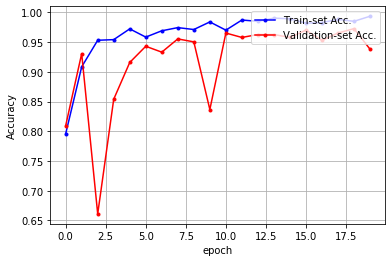

In [67]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']


x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()